# Data Engineering with Python and Jupyter Notebooks
This session covers the basics of data engineering using Python and Jupyter Notebook. Participants will learn how to process and manipulate data sets. Topics covered include data collection, data cleaning, data transformation, and data visualization.


## 1. Data Collection
Data collection is the process of gathering and measuring information on variables of interest, in an organized and systematic way. It is important because it provides the foundation for data analysis and decision-making. 

There are several different sources of data, including:

Surveys: Surveys involve asking individuals or groups of people questions about their opinions, experiences, or behaviors. Surveys can be conducted through various means, such as online, by mail, or in person.

Interviews: Interviews involve asking individuals questions about a specific topic, often in a face-to-face setting. Interviews can be structured (with pre-defined questions) or unstructured (allowing for free-flowing discussion).

Observations: Observations involve watching and recording behavior or events in a systematic way. Observations can be conducted in natural settings or in controlled environments.

Existing data sources: Existing data sources include data that has already been collected for other purposes, such as government records, medical records, or social media data.

Experiments: Experiments involve manipulating one or more variables to observe the effect on other variables. Experiments can be conducted in a laboratory setting or in the field.

This practical session will use an open source data downloaded from Zindi platform under the financial inclusion in Africa challenge.
##### Data set description
The main dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

We can download this data from:https://zindi.africa/competitions/financial-inclusion-in-africa/data

Importing Libraries

In [288]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Reading and visualizing data

In [289]:
# use the read() function to read the data 
df=pd.read_csv("dsa.csv")
origin_df=pd.read_csv("dsa.csv")

In [290]:
#use shape to check the size of data
df.shape

(23524, 13)

In [349]:
#use dtypes to check the data type
df.dtypes

unique_id                 object
country                   object
year                       int64
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [291]:
# check columns
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [292]:
# use the tail() method to get the last 5 rows of the dataframe
#df.tail()
# use the head() method to get the first 5 rows of the dataframe
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## 2. Data cleaning
Data quality refers to the accuracy, completeness, consistency, timeliness, and relevance of data. In other words, it refers to the overall fitness of data for its intended use. Data quality is important because it affects the decisions and actions that are based on that data. Poor-quality data can lead to inaccurate analysis, faulty conclusions, and poor decision-making.

Importance of data quality

Trustworthy insights: Data quality ensures that the insights derived from data are trustworthy and reliable, leading to better decision-making.

Cost savings: Poor-quality data can lead to errors and inefficiencies, resulting in wasted time, resources, and money.

Compliance: Many industries are regulated by data protection and privacy laws. Poor-quality data can result in legal and regulatory compliance issues.

Customer satisfaction: Data quality impacts the customer experience, as incorrect or incomplete customer data can result in errors and frustration.

Competitive advantage: Good data quality can provide a competitive advantage by enabling organizations to make better decisions and respond more quickly to changes in the market.

In [293]:
#count unique values
df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                3
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [294]:
#checking unique value
for column in df.columns:
    print(column, df[column].unique())   

country ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
year [2018 2016 2017]
uniqueid ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
bank_account ['Yes' 'No']
location_type ['Rural' 'rural' 'Urban']
cellphone_access ['Yes' 'No']
household_size [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
age_of_respondent [ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]
gender_of_respondent ['Female' 'Male' nan]
relationship_with_head ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
marital_status ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
education_level ['Secondary

In [295]:
# filter by rural location 
df[df['location_type']=='rural']

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
1,Kenya,2018,uniqueid_2,No,rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
18,Kenya,2018,uniqueid_19,No,rural,Yes,1,48,Female,Head of Household,Single/Never Married,Vocational/Specialised training,Formally employed Private
6069,Rwanda,2016,uniqueid_2,Yes,rural,Yes,4,26,Female,Spouse,Married/Living together,Secondary education,Self employed
6086,Rwanda,2016,uniqueid_19,No,rural,No,3,30,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
14804,Tanzania,2017,uniqueid_2,No,rural,No,2,100,Male,Head of Household,Single/Never Married,No formal education,Self employed
14821,Tanzania,2017,uniqueid_19,No,rural,No,2,60,Female,Spouse,Single/Never Married,No formal education,Self employed
21424,Uganda,2018,uniqueid_2,No,rural,Yes,8,65,Female,Head of Household,Widowed,Secondary education,Self employed
21441,Uganda,2018,uniqueid_19,No,rural,Yes,4,20,Male,Other relative,Single/Never Married,Secondary education,Other Income


In [296]:
# replace for particular indices
#df.loc[df['uniqueid'].isin(['uniqueid_2', 'uniqueid_19']), 'location_type'] = 'rural'
# replace for all the column
#df['location_type'] = df['location_type'].replace('Rural', 'rural')
# replace in all the data set
# use replace() function to deal with inconsistant values
df.replace('rural', 'Rural', inplace=True)

In [297]:
#df_train[df_train["location_type"]=="Rural"].shape[0] *100/df_train.shape[0]
# filter by rural location 
df[df['location_type']=='rural']

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type


#### Missing values
missing values can introduce bias and imprecision into statistical analyses and modeling. When data is missing, it can affect the overall quality of the dataset and potentially distort the results of any analysis or modeling that relies on that data.

Techniques to adress missing values

imputation techniques, where missing values are replaced with plausible values (mode(), mean(), median(), neighbor method)

exclusion techniques, where incomplete observations are simply excluded from the analysis

In [298]:
df.isna().mean() * 100

country                   0.000000
year                      0.000000
uniqueid                  0.000000
bank_account              0.000000
location_type             0.000000
cellphone_access          0.000000
household_size            0.000000
age_of_respondent         0.000000
gender_of_respondent      0.034008
relationship_with_head    0.000000
marital_status            0.000000
education_level           0.000000
job_type                  0.000000
dtype: float64

In [299]:
# remove any rows with NaN values
#df = df.dropna()

In [300]:
def countplot(var,df):
    plt.figure(figsize=(10,6))
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(x=var, data=df,hue=var, hue_order=list(df[var].unique()))
# Calculate percentage of each category
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)


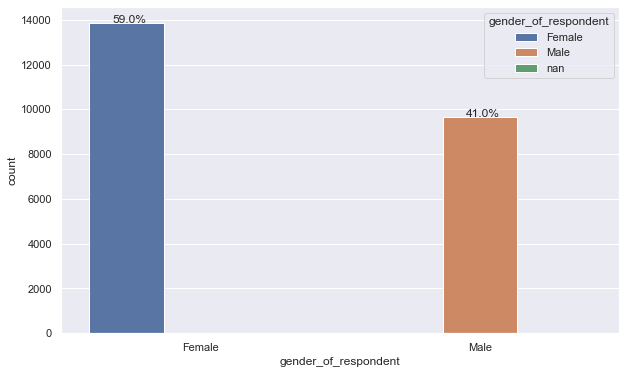

In [301]:
countplot('gender_of_respondent',df)

In [302]:
df['gender_of_respondent'].mode()

0    Female
dtype: object

In [303]:
# replace NaN values in the 'gender of respondent' column with the mode
mode = df['gender_of_respondent'].mode().iloc[0]
#df['gender_of_respondent'].fillna(value=mode, inplace=True)

In [304]:
# Calculate the gender distribution in the available data
gender_dist = df['gender_of_respondent'].value_counts(normalize=True)
gender_dist
# Assign genders to the NaN values based on the gender distribution
# Here, we'll use a 60/40 split of male/female genders
n_missing = df['gender_of_respondent'].isna().sum()
n_missing
n_male = int(n_missing * gender_dist['Male'])
n_female = n_missing - n_male

df.loc[df['gender_of_respondent'].isna(), 'gender_of_respondent'] = np.random.choice(['Male']*n_male + ['Female']*n_female, size=n_missing)


In [305]:
df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

## 3. Data Transformation
Data transformation refers to the process of converting data from one format or structure to another, with the goal of making it more suitable for analysis, processing, or visualization. This can involve a variety of techniques, such as filtering, sorting, aggregating, cleaning, and normalizing data.

Data transformation is important because it helps to prepare data for use in various applications and contexts. Raw data often contains errors, inconsistencies, or redundancies that can make it difficult to work with. By transforming data, you can improve its quality, consistency, and usefulness, making it easier to extract insights and make informed decisions.

Some common examples of data transformation include:

Converting data from one file format to another, such as from a CSV file to a JSON file. Removing duplicate or irrelevant data points. Aggregating data into summary statistics or averages. Normalizing data to a common scale or format. Overall, data transformation is a crucial step in the data analysis process, as it allows you to clean, reorganize, and refine data so that it can be used effectively.

Creating a new column

In [306]:
df["unique_id"]=df["uniqueid"] + " " + "x"+" "+df["country"]

In [307]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,unique_id
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,uniqueid_1 x Kenya
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,uniqueid_2 x Kenya
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,uniqueid_3 x Kenya
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,uniqueid_4 x Kenya
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,uniqueid_5 x Kenya


In [308]:
# shift column 'unique_id' to first position
key_var = df.pop('unique_id')  
# insert column using insert(position,column_name,value)
df.insert(0, 'unique_id', key_var)

In [309]:
df.head()

,unique_id,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,uniqueid_1 x Kenya,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,uniqueid_2 x Kenya,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,uniqueid_3 x Kenya,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,uniqueid_4 x Kenya,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,uniqueid_5 x Kenya,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [310]:
# drop row where age of respondent is less than 18
#df = df.drop(df[df['age_of_respondent']<18].index)
# drop a row using its index
#df = df.drop(2)
# use the drop() method to drop a column
df.drop('uniqueid',axis=1,inplace=True)

In [311]:
data=df.copy()

Converting categorical variables into numerical variables

In [312]:
# List of cathegorical variables with only two unique values
binary_cat_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns
            if df[col].nunique() == 2]
binary_cat_cols

['bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent']

In [313]:
#convert all categorical variables to numeric
df[binary_cat_cols] = df[binary_cat_cols].apply(lambda x: pd.factorize(x)[0])

In [314]:
df.head()

,unique_id,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,uniqueid_1 x Kenya,Kenya,2018,0,0,0,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,uniqueid_2 x Kenya,Kenya,2018,1,0,1,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,uniqueid_3 x Kenya,Kenya,2018,0,1,0,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,uniqueid_4 x Kenya,Kenya,2018,1,0,0,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,uniqueid_5 x Kenya,Kenya,2018,1,1,1,8,26,1,Child,Single/Never Married,Primary education,Informally employed


In [315]:
# set key variable as index
df.set_index("unique_id")
#df.reset_index("unique_id")

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
unique_id,,,,,,,,,,,,
uniqueid_1 x Kenya,Kenya,2018,0,0,0,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
uniqueid_2 x Kenya,Kenya,2018,1,0,1,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
uniqueid_3 x Kenya,Kenya,2018,0,1,0,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
uniqueid_4 x Kenya,Kenya,2018,1,0,0,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
uniqueid_5 x Kenya,Kenya,2018,1,1,1,8,26,1,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
uniqueid_2113 x Uganda,Uganda,2018,1,0,0,4,48,0,Head of Household,Divorced/Seperated,No formal education,Other Income
uniqueid_2114 x Uganda,Uganda,2018,1,0,0,2,27,0,Head of Household,Single/Never Married,Secondary education,Other Income
uniqueid_2115 x Uganda,Uganda,2018,1,0,0,5,27,0,Parent,Widowed,Primary education,Other Income


In [316]:
column = df[df.columns[1:]].select_dtypes(['object','category']).columns
#column
dummies=pd.get_dummies(df, columns=column, drop_first=True)
#dummies
df=pd.concat([df,dummies],axis=1)

In [317]:
df.head()

,unique_id,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,uniqueid_1 x Kenya,Kenya,2018,0,0,0,3,24,0,Spouse,...,0,0,0,0,0,0,0,0,0,1
1,uniqueid_2 x Kenya,Kenya,2018,1,0,1,5,70,0,Head of Household,...,0,0,0,0,1,0,0,0,0,0
2,uniqueid_3 x Kenya,Kenya,2018,0,1,0,5,26,1,Other relative,...,1,0,0,0,0,0,0,0,0,1
3,uniqueid_4 x Kenya,Kenya,2018,1,0,0,5,34,0,Head of Household,...,0,0,0,1,0,0,0,0,0,0
4,uniqueid_5 x Kenya,Kenya,2018,1,1,1,8,26,1,Child,...,0,0,0,0,0,1,0,0,0,0


In [318]:
df.shape

(23524, 47)

In [319]:
df.drop(column, axis=1, inplace=True)

In [320]:
df.shape

(23524, 42)

## 4.  Loading the data
Data loading is the process of transferring data from various sources into a database or data warehouse for storage and analysis. It is a crucial step in the data management process and is important for ensuring that data is organized, accessible, and ready for analysis.

Data loading involves inserting the transformed data into a database or data warehouse for storage and analysis.

Data loading is important for several reasons:

Organization: Data loading helps organize and consolidate data from multiple sources into a single location, making it easier to manage and analyze.

Accessibility: Data loading makes data easily accessible to users who need it for analysis or decision-making.

Efficiency: Data loading automates the process of collecting and storing data, which saves time and reduces the risk of errors.

Accuracy: Data loading ensures that data is accurate, consistent, and up-to-date, which is essential for making informed decisions.

Scalability: Data loading enables organizations to handle large amounts of data, which is important as data volumes continue to grow.

In [321]:
path = "C:/Users/aurel/Documents/My_Project/Zindi_challenge/Financial Inclusion in Africa/"
filename = 'final_data.csv'

#save the DataFrame to a CSV file
df.to_csv(path + filename, index=False)

## 5. Visualizing the data
Data visualization refers to the presentation of data in a graphical or pictorial format. It is an essential tool for understanding data and communicating insights effectively. By visualizing data, patterns and trends become more apparent, and it is easier to discover relationships and draw conclusions from the information presented.

Data visualization allows users to explore and analyze data more efficiently than with traditional methods, such as tables or spreadsheets. It can be used to discover outliers, detect trends, and identify patterns that may not be easily identifiable with numerical data alone. Additionally, it allows users to communicate complex data effectively, making it accessible to a wider audience.

In [376]:
def distribution_bank_account(df,var):   
    # Group the data by country and region and count the number of occurrences
    grouped_data = data.groupby([var, 'bank_account']).size().reset_index(name='Count')
    # Create a pivot table to reshape the data for plotting
    pivot_table = pd.pivot_table(grouped_data, values='Count', index=var, columns='bank_account')
    # Calculate the total count for each country
    country_total = pivot_table.sum(axis=1)
    # Convert the counts to percentages
    percentages = pivot_table.div(country_total, axis=0) * 100
    # Create a figure object and set the size
    fig = plt.figure(figsize=(10, 6))

    # Add a subplot
    ax = fig.add_subplot(1, 1, 1)

    # Set the x-axis values
    x = range(len(pivot_table.index))

    # Loop through the regions and add bars to the plot
    for i, region in enumerate(percentages.columns):
        bar_plot = ax.bar([xi + i * 0.4 for xi in x], percentages[region], color=['blue', 'green'][i], width=0.4)
        for bar in bar_plot:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%', ha='center', va='bottom')
    # Set the x-axis ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_table.index)

    # Set the y-axis label
    ax.set_ylabel('Percentile of Bank account')
    ax.set_xlabel(var)
    # Set the title
    ax.set_title(f'Distribution of Bank account in function of {var}')

    # Add a legend
    ax.legend(data['bank_account'].unique())
    ax.tick_params(axis='x', rotation=30)
    # Display the plot
    plt.show()
    #df['location_type']

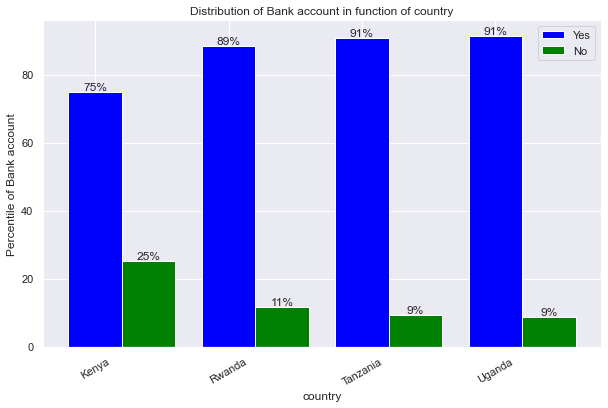

In [377]:
distribution_bank_account(data,'country')

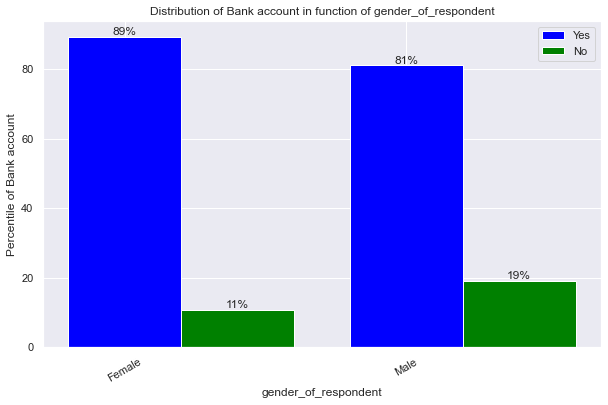

In [378]:
distribution_bank_account(data,'gender_of_respondent')

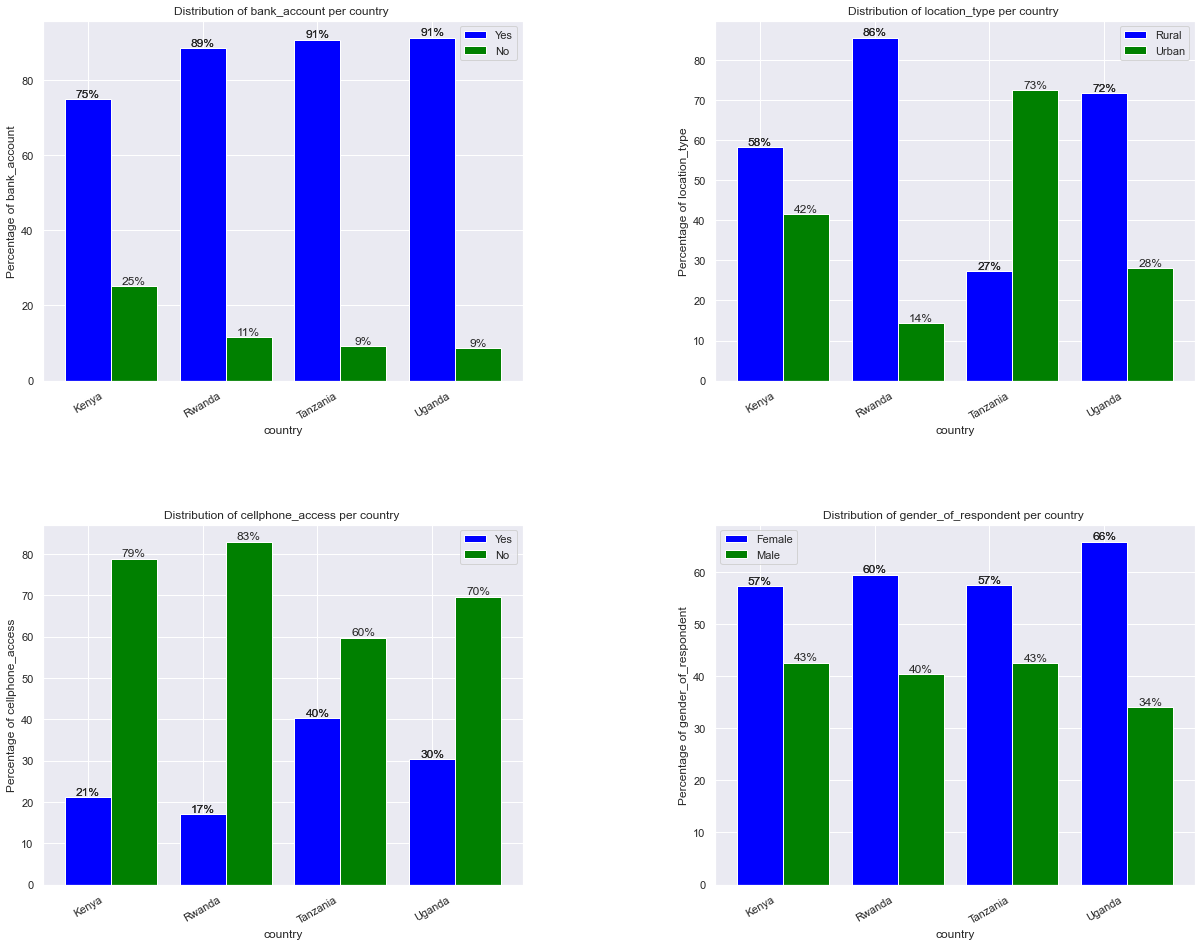

In [330]:
def subplots(df, var, binary_cat_cols):
    # Create a new figure object with a (2, 2) layout
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    # Flatten the axs array for easier indexing
    axs = axs.ravel()
    
    # Loop through the columns in binary_cat_cols
    for i, column in enumerate(binary_cat_cols):
        # Group the data by var and column and count the number of occurrences
        grouped_data = df.groupby([var, column]).size().reset_index(name='Count')
        # Create a pivot table to reshape the data for plotting
        pivot_table = pd.pivot_table(grouped_data, values='Count', index=var, columns=column)
        # Calculate the total count for each var
        var_total = pivot_table.sum(axis=1)
        # Convert the counts to percentages
        percentages = pivot_table.div(var_total, axis=0) * 100

        # Create a new subplot for each column in binary_cat_cols
        # and plot the bar chart
        x = range(len(percentages.index))
        for j, region in enumerate(percentages.columns):
            axs[i].bar([xi + j * 0.4 for xi in x], percentages[region],
                       color=['blue', 'green'][j], width=0.4, label=region)
            for k, bar in enumerate(axs[i].patches):
                height = bar.get_height()
                axs[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%', ha='center', va='bottom')

        # Set the x-axis ticks and labels
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(percentages.index)

        # Set the y-axis label
        axs[i].set_ylabel(f'Percentage of {column}')
        # Set the y-axis label
        axs[i].set_xlabel(var)
        # Set the title
        axs[i].set_title(f'Distribution of {column} per {var} ')

        # Add a legend
        axs[i].legend(data[column].unique())

        # Rotate the x-axis labels for better visibility
        axs[i].tick_params(axis='x', rotation=30)

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Display the plot
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    plt.show()
subplots(data,'country', binary_cat_cols)

In [350]:
data[(data['country']=='Kenya')&(data['year']==2018)]

,unique_id,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,uniqueid_1 x Kenya,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,uniqueid_2 x Kenya,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,uniqueid_3 x Kenya,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,uniqueid_4 x Kenya,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,uniqueid_5 x Kenya,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,uniqueid_6067 x Kenya,Kenya,2018,No,Rural,Yes,4,26,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
6064,uniqueid_6068 x Kenya,Kenya,2018,No,Urban,No,5,17,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6065,uniqueid_6069 x Kenya,Kenya,2018,No,Rural,Yes,9,30,Female,Spouse,Married/Living together,No formal education,Farming and Fishing
6066,uniqueid_6070 x Kenya,Kenya,2018,No,Rural,Yes,3,52,Male,Head of Household,Married/Living together,Primary education,Self employed


In [369]:
def subplots(df, name_of_country, name_of_year, var, col):
    # df = name of the data set
    # name_of_country = name of country (must be string)
    # name_of_year = name of year (must be an integer)

    # Calculate the number of rows and columns needed for subplots
    num_plots = len(col)
    num_rows = int(np.sqrt(num_plots))
    num_cols = int(np.ceil(num_plots / num_rows))

    # Create a new figure object with a layout based on the number of subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 5))

    # Flatten the axs array for easier indexing
    axs = axs.ravel()

    # Loop through the columns in col
    for i, column in enumerate(col):
        # Group the data by var and column and count the number of occurrences
        grouped_data = df[(df['country']==name_of_country)&(df['year']==name_of_year)].groupby([var, column]).size().reset_index(name='Count')
        # Create a pivot table to reshape the data for plotting
        pivot_table = pd.pivot_table(grouped_data, values='Count', index=var, columns=column)
        # Calculate the total count for each var
        var_total = pivot_table.sum(axis=1)
        # Convert the counts to percentages
        percentages = pivot_table.div(var_total, axis=0) * 100

        # Create a new subplot for each column in col and plot the bar chart
        x = range(len(percentages.index))
        for j, region in enumerate(percentages.columns):
            axs[i].bar([xi + j * 0.4 for xi in x], percentages[region],
                       color=['blue', 'green'][j], width=0.4, label=region)
            for k, bar in enumerate(axs[i].patches):
                height = bar.get_height()
                axs[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%', ha='center', va='bottom')

        # Set the x-axis ticks and labels
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(percentages.index)

        # Set the y-axis label
        axs[i].set_ylabel(f'Percentage of {column}')
        # Set the x-axis label
        axs[i].set_xlabel(var)
        # Set the title
        axs[i].set_title(f'Distribution of {column} per {var} in {name_of_year} in {name_of_country}')

        # Add a legend
        axs[i].legend(df[column].unique())

        # Rotate the x-axis labels for better visibility
        axs[i].tick_params(axis='x', rotation=30)

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Display the plot
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    plt.show()

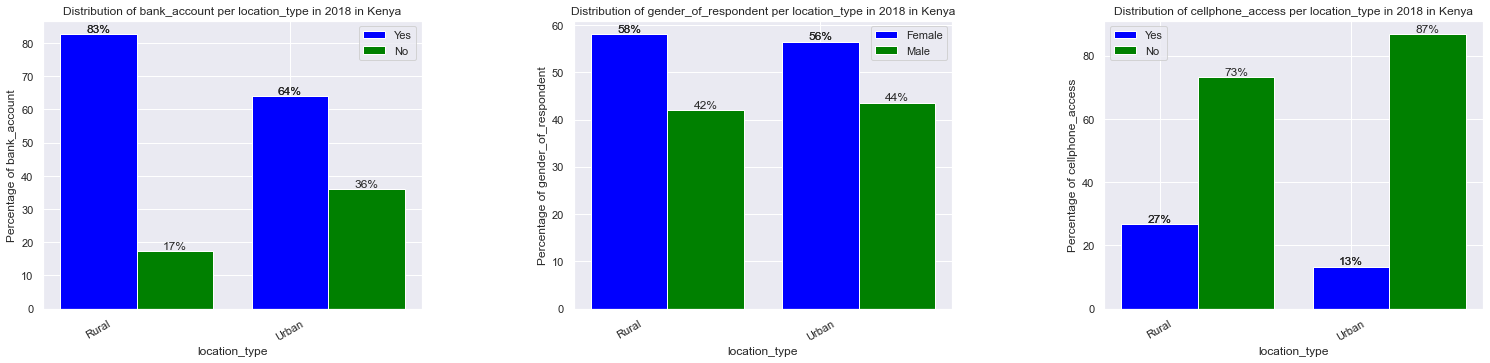

In [370]:
subplots(data,'Kenya',2018, 'location_type',['bank_account','gender_of_respondent','cellphone_access'])